In [5]:
## importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split#for decision tree object
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report 
#%matplotlib inline#for encoding

In [6]:
## mounting the google drive to import the dataset
#from google.colab import drive
#drive.mount('/content/drive')

In [7]:
## data loading to python model creation
import os
data_path = os.path.join("../app/data/physical_activity_dataset.csv")
dataset = pd.read_csv(data_path)

In [8]:
## print the initial un preprocessed data
dataset.head()

,Age,gender,weight,height,BloodPressure,cholestrol,Glucose,diabetes,discomfirt_chest,current_physical_activity_status,family_history_heart_disease,cigerette_consumption,class,Unnamed: 13
0,21.0,female,45.0,175.0,60.0,242.0,109.0,0.0,no,inactive,no,no,2.0,NaN
1,21.0,male,47.0,175.0,64.0,158.0,118.0,0.0,no,moderate,no,no,1.0,NaN
2,21.0,female,47.0,159.0,64.0,199.0,115.0,0.0,no,inactive,no,no,1.0,NaN
3,21.0,female,47.0,160.0,76.0,165.0,99.0,0.0,no,moderate,no,no,1.0,NaN
4,21.0,male,48.0,164.0,55.0,200.0,80.0,0.0,no,moderate,no,no,2.0,NaN


In [9]:
## getting thr information of the dataset
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785 entries, 0 to 784
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               768 non-null    float64
 1   gender                            768 non-null    object 
 2   weight                            768 non-null    float64
 3   height                            768 non-null    float64
 4   BloodPressure                     768 non-null    float64
 5   cholestrol                        758 non-null    float64
 6   Glucose                           768 non-null    float64
 7   diabetes                          768 non-null    float64
 8   discomfirt_chest                  768 non-null    object 
 9   current_physical_activity_status  768 non-null    object 
 10  family_history_heart_disease      768 non-null    object 
 11  cigerette_consumption             768 non-null    object 
 12  class   



---


### According to above data description
####

> * (gender,discomfirt_chest,current_physical_activity_status,family_history_heart_disease,cigerette_consumption,class) are categorical variables



> * every other variables except above categorical variables are continous and descrete variables



> * there are few null value Rows to be dropped and an unwanted column


---









In [10]:
## checking weather there are any nulls
null_rows = dataset.isnull().any()
print("number of rows that has null values : ", null_rows)

## selecting dataset
dataset.drop(dataset.columns[13], axis=1, inplace=True)
print("nulls are dropped")

number of rows that has null values :  Age                                 True
gender                              True
weight                              True
height                              True
BloodPressure                       True
cholestrol                          True
Glucose                             True
diabetes                            True
discomfirt_chest                    True
current_physical_activity_status    True
family_history_heart_disease        True
cigerette_consumption               True
class                               True
Unnamed: 13                         True
dtype: bool
nulls are dropped


In [11]:
## removing the null values with rows
cleaned_dataset = dataset.dropna()

In [12]:
## information after removing the null values
cleaned_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 758 entries, 0 to 767
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               758 non-null    float64
 1   gender                            758 non-null    object 
 2   weight                            758 non-null    float64
 3   height                            758 non-null    float64
 4   BloodPressure                     758 non-null    float64
 5   cholestrol                        758 non-null    float64
 6   Glucose                           758 non-null    float64
 7   diabetes                          758 non-null    float64
 8   discomfirt_chest                  758 non-null    object 
 9   current_physical_activity_status  758 non-null    object 
 10  family_history_heart_disease      758 non-null    object 
 11  cigerette_consumption             758 non-null    object 
 12  class        

In [13]:
## onehot encoding
## Data transformation

# categorical_columns
categorical_columns = ["diabetes","gender","discomfirt_chest","current_physical_activity_status","family_history_heart_disease","cigerette_consumption"]
categorical_columns_enc = ["diabetes_","gender_","discomfirt_chest_","current_physical_activity_status_","family_history_heart_disease_","cigerette_consumption_"]
# one hot encoding
cleaned_dataset[categorical_columns_enc] = cleaned_dataset[categorical_columns].apply(lambda x: pd.factorize(x)[0])
cleaned_dataset.head()

/tmp/ipykernel_320350/2692323782.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_dataset[categorical_columns_enc] = cleaned_dataset[categorical_columns].apply(lambda x: pd.factorize(x)[0])
/tmp/ipykernel_320350/2692323782.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_dataset[categorical_columns_enc] = cleaned_dataset[categorical_columns].apply(lambda x: pd.factorize(x)[0])
/tmp/ipykernel_320350/2692323782.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

,Age,gender,weight,height,BloodPressure,cholestrol,Glucose,diabetes,discomfirt_chest,current_physical_activity_status,family_history_heart_disease,cigerette_consumption,class,diabetes_,gender_,discomfirt_chest_,current_physical_activity_status_,family_history_heart_disease_,cigerette_consumption_
0,21.0,female,45.0,175.0,60.0,242.0,109.0,0.0,no,inactive,no,no,2.0,0,0,0,0,0,0
1,21.0,male,47.0,175.0,64.0,158.0,118.0,0.0,no,moderate,no,no,1.0,0,1,0,1,0,0
2,21.0,female,47.0,159.0,64.0,199.0,115.0,0.0,no,inactive,no,no,1.0,0,0,0,0,0,0
3,21.0,female,47.0,160.0,76.0,165.0,99.0,0.0,no,moderate,no,no,1.0,0,0,0,1,0,0
4,21.0,male,48.0,164.0,55.0,200.0,80.0,0.0,no,moderate,no,no,2.0,0,1,0,1,0,0




---


### *above transformations includes*


> * converting categorical values to numerical type 


---





In [14]:
# take data needed for classification model
processed_data = cleaned_dataset[["Age","gender_","weight","height","BloodPressure","cholestrol","Glucose","diabetes_","discomfirt_chest_",
               "current_physical_activity_status_","family_history_heart_disease_","cigerette_consumption_","class"]]

In [15]:
processed_data.head()

,Age,gender_,weight,height,BloodPressure,cholestrol,Glucose,diabetes_,discomfirt_chest_,current_physical_activity_status_,family_history_heart_disease_,cigerette_consumption_,class
0,21.0,0,45.0,175.0,60.0,242.0,109.0,0,0,0,0,0,2.0
1,21.0,1,47.0,175.0,64.0,158.0,118.0,0,0,1,0,0,1.0
2,21.0,0,47.0,159.0,64.0,199.0,115.0,0,0,0,0,0,1.0
3,21.0,0,47.0,160.0,76.0,165.0,99.0,0,0,1,0,0,1.0
4,21.0,1,48.0,164.0,55.0,200.0,80.0,0,0,1,0,0,2.0


<Axes: >

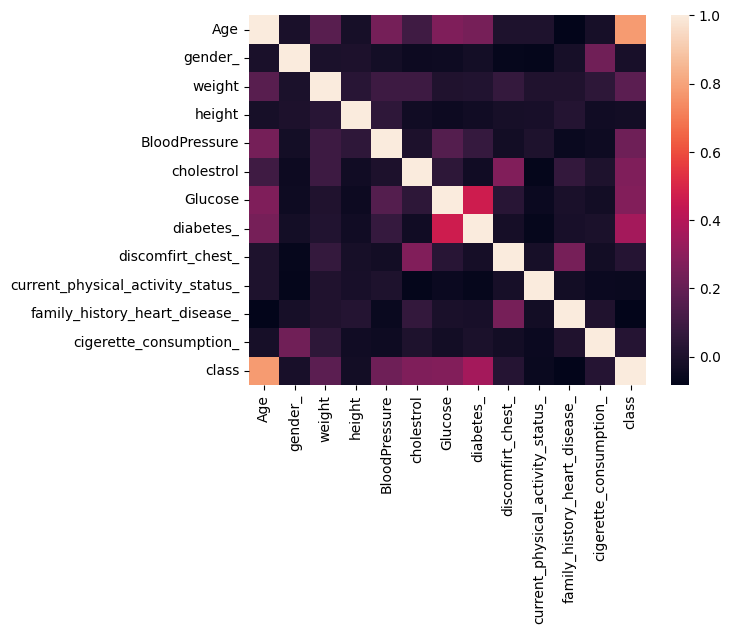

In [16]:
## get the correlation matrix
sns.heatmap(processed_data.corr())



---


### # above codebase is related to preprocessing of data
### # next get the dataset ready for the model bulding


---


### # in order to build the classification model for decision tree


> ### # seperating the data for trining and testing data


> ### # build the classification model


> ### # test the model using testing set


> ### # check the accuracy of the model


> ### # check if there any overfitting or under fitting and resolve


---





















In [17]:
# seperating target variable and the features
target = processed_data['class']
df1 = processed_data.copy()
df1 = df1.drop('class', axis =1)

In [18]:
target

0      2.0
1      1.0
2      1.0
3      1.0
4      2.0
      ... 
763    3.0
764    4.0
765    4.0
766    4.0
767    4.0
Name: class, Length: 758, dtype: float64

In [19]:
## defining the attributes
x = df1 # get the data for x independant variables
y = target # get the predictor or the dependant variable

In [20]:
## splitting the dataset to training and testing 
# Splitting the data - 60:40 ratio
X_train, X_test, y_train, y_test = train_test_split(x , y, test_size = 0.3, random_state = 42)
print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)

Training split input-  (530, 12)
Testing split input-  (228, 12)


In [21]:
## Defining the decision tree algorithmdtree=DecisionTreeClassifier()
gb = GradientBoostingClassifier(n_estimators=200,learning_rate=.1)
gb.fit(X_train.values,y_train)
print('Decision Tree Classifier Created')

Decision Tree Classifier Created


In [22]:
## Predicting the values of test data
y_pred = gb.predict(X_test.values)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

         1.0       0.98      0.98      0.98        49
         2.0       0.99      0.99      0.99       123
         3.0       1.00      1.00      1.00         7
         4.0       1.00      1.00      1.00        49

    accuracy                           0.99       228
   macro avg       0.99      0.99      0.99       228
weighted avg       0.99      0.99      0.99       228





---
### single row predicting


---




In [23]:
person_01 = [50,0,45,132,65,150,100,0,0,0,0,0]
arr = np.array(person_01)
arr = arr.reshape(1,12)
gb.predict(arr)

array([3.])



---


### model performance increasing if there are any issues


---



In [24]:
print(type(y_test))
print(type(y_pred))

## convert y_test to numpy array
y_test_n = y_test.to_numpy()

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [25]:
## importing confusion matrix library
from sklearn.metrics import confusion_matrix

In [26]:
## printing the confusion matrix 
cm = confusion_matrix(y_test_n, y_pred, labels=[1, 2, 3, 4])

In [27]:
cm_df = pd.DataFrame(cm,
                     index = ['pool_01','pool_02','pool_03','pool_04'], 
                     columns = ['pool_01','pool_02','pool_03','pool_04'])

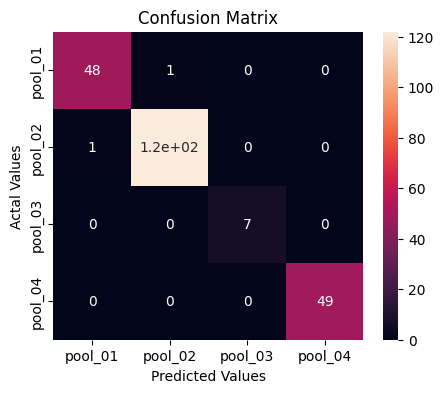

In [28]:
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()



---


#### according to the confusion matrix results for the testing set 
only 2 has false positive predictions
the results which gives in the accuracy of the model are correct accuracies


---





---
dumping the created model


---




In [29]:
import os

In [30]:
os.getcwd()

'/home/kosala/git-repos/physical_activity_routine_creation_module/hexagonal-flask-app/ML_models'

In [31]:

import pickle
path_to_model = os.path.join("../ML_models/model.pkl")
# Save the trained model as a pickle string.
pickle.dump(gb, open(path_to_model, 'wb'))
 
# Load the pickled model
pickled_model = pickle.load(open(path_to_model, 'rb'))
 
# Use the loaded pickled model to make predictions
pickled_model.predict(arr)

array([3.])